## Airline Passengers with Multiple Time Steps

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

np.random.seed(45)

In [2]:
df = pd.read_csv('airline-passengers.csv')
input = df.copy()

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))


In [4]:
scaled = scaler.fit_transform(df[['Passengers']])
scaled_df = pd.DataFrame(scaled, columns=['Passengers'])
scaled_df['Month'] = df['Month']
df = scaled_df

In [5]:
train_size = int(len(df) * 0.67)
test_size = len(df) - train_size
train = df.iloc[:train_size, :]
test = df.iloc[train_size:, :]

In [6]:
train[0:3]['Passengers'].values

array([0.01544402, 0.02702703, 0.05405405])

In [7]:
def createData(data, look_back=1):
    X, y = [], []
    for i in range(len(data)-look_back-1):
        a=data[i:(i+look_back)]['Passengers'].values
        X.append(a)
        y.append(data.iloc[i+look_back,0])
    return np.array(X), np.array(y)

In [8]:
look_back=3
X_train, y_train = createData(train,look_back)
X_test, y_test = createData(test,look_back)

In [9]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1,  X_test.shape[1]))


In [10]:
X_train.shape

(92, 1, 3)

In [11]:
y_train.shape

(92,)

In [12]:
X_train,y_train

(array([[[0.01544402, 0.02702703, 0.05405405]],
 
        [[0.02702703, 0.05405405, 0.04826255]],
 
        [[0.05405405, 0.04826255, 0.03281853]],
 
        [[0.04826255, 0.03281853, 0.05984556]],
 
        [[0.03281853, 0.05984556, 0.08494208]],
 
        [[0.05984556, 0.08494208, 0.08494208]],
 
        [[0.08494208, 0.08494208, 0.06177606]],
 
        [[0.08494208, 0.06177606, 0.02895753]],
 
        [[0.06177606, 0.02895753, 0.        ]],
 
        [[0.02895753, 0.        , 0.02702703]],
 
        [[0.        , 0.02702703, 0.02123552]],
 
        [[0.02702703, 0.02123552, 0.04247104]],
 
        [[0.02123552, 0.04247104, 0.07142857]],
 
        [[0.04247104, 0.07142857, 0.05984556]],
 
        [[0.07142857, 0.05984556, 0.04054054]],
 
        [[0.05984556, 0.04054054, 0.08687259]],
 
        [[0.04054054, 0.08687259, 0.12741313]],
 
        [[0.08687259, 0.12741313, 0.12741313]],
 
        [[0.12741313, 0.12741313, 0.1042471 ]],
 
        [[0.12741313, 0.1042471 , 0.05598456]],
 


In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [14]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back),))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")

In [15]:
model.fit(X_train, y_train, epochs=100, batch_size=1)

Epoch 1/100
92/92 [==============================] - 10s 8ms/step - loss: 0.0528
Epoch 2/100
92/92 [==============================] - 1s 6ms/step - loss: 0.0235
Epoch 3/100
92/92 [==============================] - 1s 6ms/step - loss: 0.0153
Epoch 4/100
92/92 [==============================] - 1s 6ms/step - loss: 0.0132
Epoch 5/100
92/92 [==============================] - 1s 6ms/step - loss: 0.0120
Epoch 6/100
92/92 [==============================] - 1s 6ms/step - loss: 0.0108
Epoch 7/100
92/92 [==============================] - 1s 6ms/step - loss: 0.0096
Epoch 8/100
92/92 [==============================] - 1s 6ms/step - loss: 0.0087
Epoch 9/100
92/92 [==============================] - 1s 6ms/step - loss: 0.0081
Epoch 10/100
92/92 [==============================] - 1s 6ms/step - loss: 0.0074
Epoch 11/100
92/92 [==============================] - 1s 6ms/step - loss: 0.0069
Epoch 12/100
92/92 [==============================] - 1s 6ms/step - loss: 0.0063
Epoch 13/100
92/92 [================

In [16]:
preds = model.predict(X_train)
testPreds = model.predict(X_test)

In [17]:
preds = scaler.inverse_transform(preds)
testPreds = scaler.inverse_transform(testPreds)
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])

In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
trainScore = np.sqrt(mean_squared_error(y_train[0], preds[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test[0], testPreds[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 21.52 RMSE
Test Score: 66.65 RMSE


In [20]:
trainPredictPlot = np.empty_like(df.values)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(preds)+look_back, :] = preds


In [21]:
trainPredictPlot

array([[nan, nan],
       [nan, nan],
       [nan, nan],
       [132.5003662109375, 132.5003662109375],
       [131.40478515625, 131.40478515625],
       [125.16242980957031, 125.16242980957031],
       [136.23585510253906, 136.23585510253906],
       [148.0740509033203, 148.0740509033203],
       [149.78794860839844, 149.78794860839844],
       [139.77459716796875, 139.77459716796875],
       [124.52159881591797, 124.52159881591797],
       [110.7896499633789, 110.7896499633789],
       [120.31942749023438, 120.31942749023438],
       [118.10810852050781, 118.10810852050781],
       [127.6396255493164, 127.6396255493164],
       [140.9299774169922, 140.9299774169922],
       [137.5543670654297, 137.5543670654297],
       [129.26809692382812, 129.26809692382812],
       [148.9287567138672, 148.9287567138672],
       [169.0467987060547, 169.0467987060547],
       [171.7394256591797, 171.7394256591797],
       [161.26318359375, 161.26318359375],
       [138.2797393798828, 138.27973937988

In [22]:
testPredictPlot = np.empty_like(df.values)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(preds)+(look_back*2) + 1:len(df)-1, :] = testPreds


In [23]:
testPredictPlot

array([[nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan,

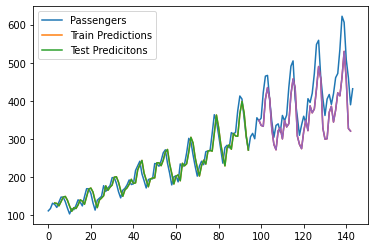

In [24]:
plt.plot(input['Passengers'])
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Passengers', 'Train Predictions', 'Test Predicitons'])

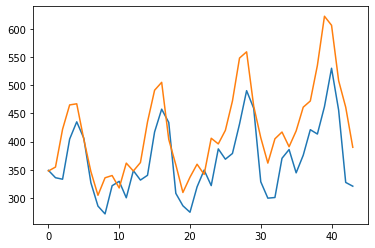

In [25]:
plt.plot(testPreds)
plt.plot(y_test[0])

## Training an LSTM with Memory between Batches

In [30]:
y_train=y_train.reshape((-1,1))

In [32]:
y_train

array([[129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.],
       [230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [302.],
       [293.],
       [259.],
       [22

In [43]:
batch_size=1

model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size,1, look_back),stateful=True))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")

for i in range(300):
    print(f"Epoch {i}/300:")
    model.fit(X_train,y_train,epochs=1,batch_size=1,shuffle=False)
    model.reset_states()


Epoch 0/300:
92/92 [==============================] - 1s 2ms/step - loss: 51337.7344
Epoch 1/300:
92/92 [==============================] - 0s 2ms/step - loss: 51032.2344
Epoch 2/300:
92/92 [==============================] - 0s 2ms/step - loss: 50689.2500
Epoch 3/300:
92/92 [==============================] - 0s 2ms/step - loss: 50323.7383
Epoch 4/300:
92/92 [==============================] - 0s 2ms/step - loss: 49991.8516
Epoch 5/300:
92/92 [==============================] - 0s 2ms/step - loss: 49703.2344
Epoch 6/300:
92/92 [==============================] - 0s 2ms/step - loss: 49445.4258
Epoch 7/300:
92/92 [==============================] - 0s 2ms/step - loss: 49207.2656
Epoch 8/300:
92/92 [==============================] - 0s 2ms/step - loss: 48982.1914
Epoch 9/300:
92/92 [==============================] - 0s 2ms/step - loss: 48766.3164
Epoch 10/300:
92/92 [==============================] - 0s 2ms/step - loss: 48557.2891
Epoch 11/300:
92/92 [==============================] - 0s 2ms/st

As we can see, resetting the model states is not very benificial for this problem as the model is unable to predict well and is not able to improve and learn from its own mistakes.